## <center>Silhouette Clustering</center>

In [8]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [7]:

# Sample customer dataset
data = {
    'CustomerID': range(1, 51),
    'Age': [25, 34, 45, 23, 35, 40, 29, 31, 50, 28, 33, 37, 42, 26, 38, 41, 27, 30, 32, 36, 39, 43, 44, 46, 47, 48, 49, 24, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'AnnualIncome': [50000, 60000, 70000, 55000, 65000, 75000, 52000, 62000, 72000, 58000, 63000, 68000, 73000, 54000, 67000, 74000, 56000, 61000, 66000, 69000, 71000, 76000, 78000, 80000, 82000, 84000, 86000, 57000, 59000, 61000, 63000, 65000, 67000, 69000, 71000, 73000, 75000, 77000, 79000, 81000, 83000, 85000, 87000, 89000, 91000, 93000, 95000, 97000, 99000, 100000],
    'SpendingScore': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15, 77, 13, 79, 35, 53 , 11, 66, 29, 98, 15, 77, 13, 79, 35, 66, 29, 98, 15, 77, 13, 79, 35, 66, 29, 98, 15, 77, 13, 79, 35, 66, 29, 98, 15, 77, 13, 79]
}

df = pd.DataFrame(data)
df.head(3)

,CustomerID,Age,AnnualIncome,SpendingScore
0,1,25,50000,39
1,2,34,60000,81
2,3,45,70000,6


In [11]:
#selecting features for clustering 
x = df.drop('CustomerID' , axis = 1)

In [12]:
#applying kmeans clustering 

model = KMeans(n_clusters=3 , random_state= 42).fit(x)
labels = model.labels_

In [14]:
#calculating the silhouette score 
silhouette_avg = silhouette_score(x , labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5289323991498237


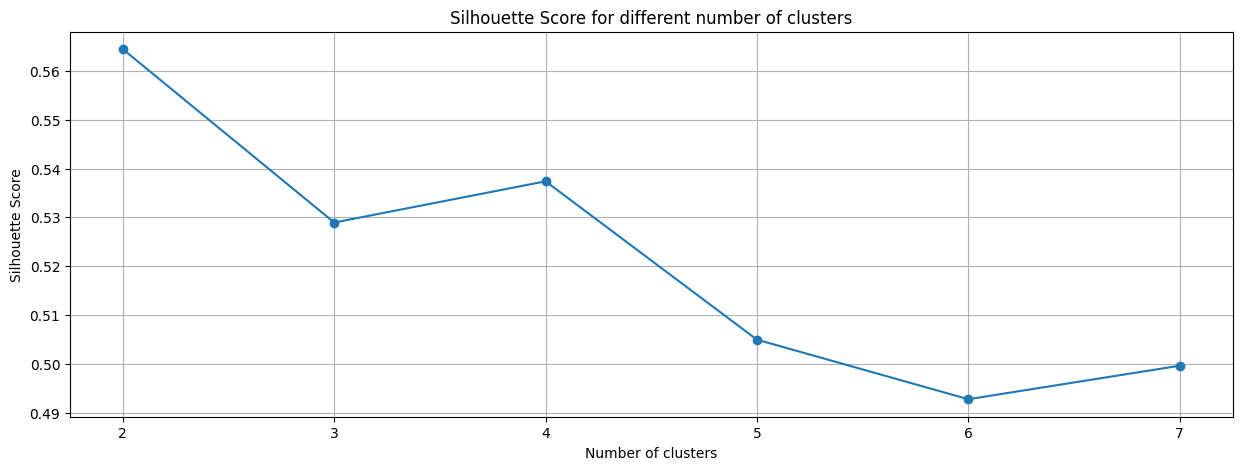

In [20]:
#plotting the silhouette score for various clusters
range_n_clusters =  [2,3,4,5,6,7]
silhouette_scores = []

for n in range_n_clusters:
    kmeans = KMeans(n_clusters=n , max_iter= 100 , random_state= 54).fit(x)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(x , labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(15,5))   
plt.plot(range_n_clusters , silhouette_scores , marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters')
plt.grid()
plt.show()

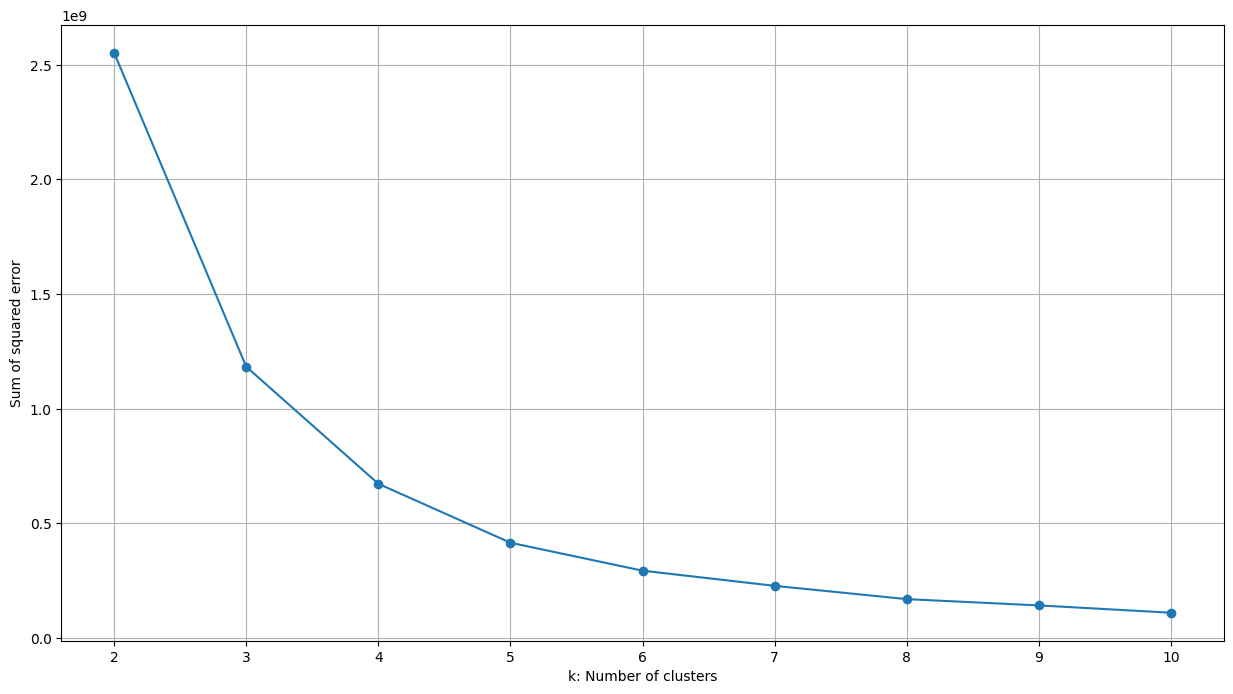

In [24]:
#checking the elbow point 
plt.figure(figsize=(15,8))   
ssd = []
range_clusters = list(range(2,11))
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k , max_iter=1000 , random_state= 44)
    kmeans.fit(x)
    ssd.append(kmeans.inertia_)
plt.plot(range_clusters , ssd , marker = 'o')
plt.xlabel('k: Number of clusters')
plt.ylabel('Sum of squared error')
plt.grid()

- **According to elbow point clusters = 4/5**
- **According to silhouette scores cluster = 2**

## Balancing Silhouette Score and Elbow Method

### Silhouette Score
Indicates how well-separated and cohesive the clusters are. A higher score means better-defined clusters.

### Elbow Method
Helps to identify the point where adding more clusters doesn’t significantly improve the total variance explained. This is often where the “elbow” or bend in the plot occurs.

### Decision-Making
- **If interpretability and cluster quality are your main concerns**, you might prioritize the silhouette score and choose 2 clusters.
- **If you need a balance between cluster quality and the amount of variance explained**, you might lean towards the elbow method and choose 3 clusters.

### Practical Approach
1. **Examine the Clusters**: Look at the clusters formed by both 2 and 3 clusters. Check if the clusters make sense in the context of your data.
2. **Business Context**: Consider the practical implications. For example, if you’re segmenting customers, does having 2 or 3 segments provide more actionable insights?
3. **Visual Inspection**: Plot the clusters and see if they are well-separated and meaningful.